In [1]:
pip install --upgrade pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [5]:
import datetime as dt
import pandas as pd
import numpy as np

from pandas_datareader import data as pdr
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

In [21]:
import yfinance as yf
import datetime as dt

end = dt.datetime.now()
start = dt.datetime(2015, 1, 1)

df = yf.download(['^AXJO', 'CBA.AX', 'NAB.AX', 'STO.AX'], start=start, end=end)

Close = df['Close']
print(Close.head())


[*********************100%%**********************]  4 of 4 completed

Ticker         CBA.AX     NAB.AX    STO.AX        ^AXJO
Date                                                   
2015-01-02  85.277962  31.925041  7.132698  5435.899902
2015-01-05  85.486832  31.972605  7.193661  5450.299805
2015-01-06  84.840332  31.715757  6.575320  5364.799805
2015-01-07  84.651360  31.791861  6.488230  5353.600098
2015-01-08  84.929848  32.077248  6.357594  5381.500000


In [22]:
log_returns = np.log(df.Close/df.Close.shift(1)).dropna()
log_returns

Ticker,CBA.AX,NAB.AX,STO.AX,^AXJO
Date,,,,
2015-01-05,0.002446,0.001489,0.008511,0.002646
2015-01-06,-0.007591,-0.008066,-0.089877,-0.015812
2015-01-07,-0.002230,0.002397,-0.013333,-0.002090
2015-01-08,0.003284,0.008937,-0.020340,0.005198
2015-01-09,0.007583,0.015011,0.052046,0.015507
...,...,...,...,...
2024-10-11,-0.004047,-0.000268,0.005548,-0.001034
2024-10-14,0.008662,0.009345,-0.006940,0.004652
2024-10-15,0.017892,0.014510,-0.009797,0.007917


In [23]:
daily_std = log_returns.std()
daily_std

Ticker
CBA.AX    0.013745
NAB.AX    0.014444
STO.AX    0.025916
^AXJO     0.009744
dtype: float64

In [24]:
annualized_std = daily_std * np.sqrt(252)
annualized_std

Ticker
CBA.AX    0.218191
NAB.AX    0.229291
STO.AX    0.411399
^AXJO     0.154676
dtype: float64

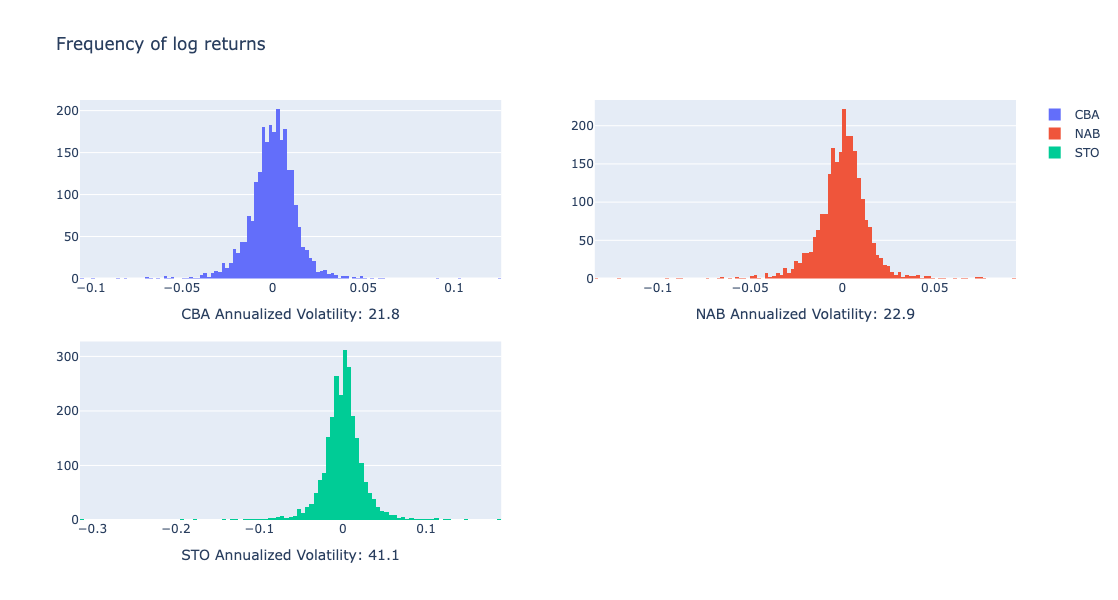

In [28]:
fig = make_subplots(rows=2, cols=2)

trace0 = go.Histogram(x=log_returns['CBA.AX'], name='CBA')
trace1 = go.Histogram(x=log_returns['NAB.AX'], name='NAB')
trace2 = go.Histogram(x=log_returns['STO.AX'], name='STO')

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig.update_layout(autosize = False, width=700, height=600, title='Frequency of log returns',
                  xaxis=dict(title='CBA Annualized Volatility: ' + str(np.round(annualized_std['CBA.AX']*100, 1))),
                  xaxis2=dict(title='NAB Annualized Volatility: ' + str(np.round(annualized_std['NAB.AX']*100, 1))),
                  xaxis3=dict(title='STO Annualized Volatility: ' + str(np.round(annualized_std['STO.AX']*100, 1))))

#fig.show(renderer="colab")

In [29]:
TRADING_DAYS = 60
volatility = log_returns.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
volatility.tail()

Ticker,CBA.AX,NAB.AX,STO.AX,^AXJO
Date,,,,
2024-10-11,0.112399,0.109674,0.118219,0.064068
2024-10-14,0.112695,0.109706,0.118122,0.063950
2024-10-15,0.113544,0.110022,0.118358,0.064221
2024-10-16,0.113525,0.110075,0.119820,0.064378
2024-10-17,0.114453,0.110899,0.115870,0.063338


In [30]:
volatility.plot().update_layout(autosize = False, width=600, height=300).show(renderer="colab")

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [35]:
Rf = 0.01/255
sharpe_ratio = (log_returns.rolling(window=TRADING_DAYS).mean() - Rf)*TRADING_DAYS / volatility

In [34]:
sharpe_ratio.plot().update_layout(autosize = False, width=600, height=300).show(renderer="colab")

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [36]:
sortino_vol = log_returns[log_returns<0].rolling(window=TRADING_DAYS, center=True, min_periods=10).std()*np.sqrt(TRADING_DAYS)
sortino_ratio = (log_returns.rolling(window=TRADING_DAYS).mean() - Rf)*TRADING_DAYS / sortino_vol
sortino_vol.plot().update_layout(autosize = False, width=600, height=300).show(renderer="colab")
sortino_ratio.plot().update_layout(autosize = False, width=600, height=300).show(renderer="colab")

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [37]:
m2_ratio = pd.DataFrame()

benchmark_vol = volatility['^AXJO']
for c in log_returns.columns:
    if c != '^AXJO':
        m2_ratio[c] = (sharpe_ratio[c]*benchmark_vol/TRADING_DAYS + Rf)*TRADING_DAYS
m2_ratio.plot().update_layout(autosize = False, width=600, height=300).show(renderer="colab")

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [38]:
def max_drawdown(returns):
    cumulative_returns = (returns+1).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns/peak)-1
    return drawdown.min()


returns = df.Close.pct_change()
max_drawdowns = returns.apply(max_drawdown, axis=0)
max_drawdowns*100

/var/folders/nh/jcdgggzs7f938g0pfg6vktj80000gn/T/ipykernel_26605/722799521.py:8: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



Ticker
CBA.AX   -43.361732
NAB.AX   -63.126540
STO.AX   -69.444444
^AXJO    -36.530541
dtype: float64

In [39]:
calmars = np.exp(log_returns.mean()*255)/abs(max_drawdowns)
calmars.plot.bar().update_layout(autosize = False, width=600, height=300).show(renderer="colab")